# Q: Who Are the Writers for Top Grossing Films (Mark)

We believe that good writers are key to creating a succesful film. We wanted to find out who some of the writers are for the most succesful films. I decided to start by defining success by the finacial measure of domestic gross. So my goals was to get to a listing of writers for the Top 20 Films (based on domestic gross). We would then provide this list to our clients as writers they should approach to collaborate on future projects. 

### Importing Packages and Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 55)
pd.set_option('display.max_rows', 200)

In [3]:
Full = pd.read_csv("df_8.csv")

### Understanding the Data Frame

I like to make sure I understand the size, columns, and types of data that are contained in the dataframe. This dataframe is one that was the product of several merges, as we needed to get writers names, movie names, and financials all into one dataframe from 3 different files.

In [4]:
print(Full.shape)
print(Full.dtypes)
Full.head()

(6884, 80)
tconst                object
averagerating_x      float64
numvotes_x             int64
primary_title_x       object
original_title_x      object
start_year_x           int64
runtime_minutes_x    float64
genres_x              object
Animation_x            int64
Sport_x                int64
Mystery_x              int64
Action_x               int64
Comedy_x               int64
Documentary_x          int64
Romance_x              int64
News_x                 int64
War_x                  int64
Horror_x               int64
Fantasy_x              int64
Family_x               int64
Music_x                int64
Musical_x              int64
Sci-Fi_x               int64
History_x              int64
Biography_x            int64
Thriller_x             int64
Crime_x                int64
Adventure_x            int64
Drama_x                int64
id                     int64
release_date          object
title_x               object
vote_average_x       float64
vote_count_x           int64
Yea

,tconst,averagerating_x,numvotes_x,primary_title_x,original_title_x,start_year_x,runtime_minutes_x,genres_x,Animation_x,Sport_x,Mystery_x,Action_x,Comedy_x,Documentary_x,Romance_x,News_x,War_x,Horror_x,Fantasy_x,Family_x,Music_x,Musical_x,Sci-Fi_x,History_x,Biography_x,Thriller_x,Crime_x,...,numvotes_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,Animation_y,Sport_y,Mystery_y,Action_y,Comedy_y,Documentary_y,Romance_y,News_y,War_y,Horror_y,Fantasy_y,Family_y,Music_y,Musical_y,Sci-Fi_y,History_y,Biography_y,Thriller_y,Crime_y,Adventure_y,Drama_y
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,tt1094666,7.0,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,1613,The Hammer,Hamill,2010,108.0,"Biography,Drama,Sport",0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1


### EDA:

I counducted some EDA on domestic gross to better understand that data. I placed these in the Appendix. 

### Initial df Pruning:

I realized that the merges had created a MONSTER dataframe so first step was to cut it down to the columns I thought I might need; then to limit the films to a 5-year period; and also wanted to remove writers who had a death date listed (as not very helpful to reccomend dead writers for our client to work with). 

In [5]:
# Cutting down to just columns needed
Writers = Full[['Year_x', 'primary_title_x', 'genres_x', 'averagerating_x', 'numvotes_x','production_budget', 'domestic_gross', 'profit', 'category', 'primary_name', 'birth_year', 'death_year']]
Writers.head()

,Year_x,primary_title_x,genres_x,averagerating_x,numvotes_x,production_budget,domestic_gross,profit,category,primary_name,birth_year,death_year
0,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352,70000000.0,18848538.0,-51151462.0,writer,Sean Hood,1966.0,NaN
1,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352,70000000.0,18848538.0,-51151462.0,writer,Daniel Giat,1955.0,NaN
2,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352,70000000.0,18848538.0,-51151462.0,writer,Giulio Steve,NaN,NaN
3,2010,The Hammer,"Biography,Drama,Sport",7.0,1613,850000.0,442638.0,-407362.0,writer,Eben Kostbar,NaN,NaN
4,2010,The Hammer,"Biography,Drama,Sport",7.0,1613,850000.0,442638.0,-407362.0,writer,Joseph McKelheer,NaN,NaN


In [6]:
Writers.shape

(6884, 12)

In [7]:
Writers.Year_x.value_counts().sort_index()

2010     662
2011     586
2012     503
2013     697
2014     755
2015    1268
2016    1106
2017     790
2018     517
Name: Year_x, dtype: int64

In [8]:
# Limit the Years to a 5-year period: 2013 - 2018
Writersb = Writers.loc[Writers.Year_x >= 2013]
print(Writersb.shape)
Writersb.head()

(5133, 12)


,Year_x,primary_title_x,genres_x,averagerating_x,numvotes_x,production_budget,domestic_gross,profit,category,primary_name,birth_year,death_year
0,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352,70000000.0,18848538.0,-51151462.0,writer,Sean Hood,1966.0,NaN
1,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352,70000000.0,18848538.0,-51151462.0,writer,Daniel Giat,1955.0,NaN
2,2014,The Legend of Hercules,"Action,Adventure,Fantasy",4.2,50352,70000000.0,18848538.0,-51151462.0,writer,Giulio Steve,NaN,NaN
20,2013,The Adventurer: The Curse of the Midas Box,"Adventure,Family,Fantasy",5.4,5257,25000000.0,0.0,-25000000.0,writer,Matthew Huffman,1970.0,NaN
21,2013,The Adventurer: The Curse of the Midas Box,"Adventure,Family,Fantasy",5.4,5257,25000000.0,0.0,-25000000.0,writer,Christian Taylor,1968.0,NaN


In [9]:
# Checking to see what type of duplication of rows exist. Yes, a lot of duplicates,
# but that is ok as there are multiple writers per movie. 
Writersb.duplicated().sum()

2491

In [10]:
Writersb.isna().sum()

Year_x                  0
primary_title_x         0
genres_x                0
averagerating_x         0
numvotes_x              0
production_budget       0
domestic_gross          0
profit                  0
category                0
primary_name            0
birth_year           3095
death_year           4814
dtype: int64

In [11]:
# Removing films with a domestic gross of $0
Writersd = Writersb.loc[Writersb.domestic_gross != 0.0]

In [12]:
Writersd.shape

(4257, 12)

In [13]:
# Sort on domestic gross - this is our primary delector for top writers
Writerse= Writersd.sort_values(['domestic_gross'], ascending=False)
Writerse.head()

,Year_x,primary_title_x,genres_x,averagerating_x,numvotes_x,production_budget,domestic_gross,profit,category,primary_name,birth_year,death_year
1732,2018,Black Panther,"Action,Adventure,Sci-Fi",7.3,516148,200000000.0,700059566.0,500059566.0,writer,Joe Robert Cole,NaN,NaN
1733,2018,Black Panther,"Action,Adventure,Sci-Fi",7.3,516148,200000000.0,700059566.0,500059566.0,writer,Joe Robert Cole,NaN,NaN
1730,2018,Black Panther,"Action,Adventure,Sci-Fi",7.3,516148,200000000.0,700059566.0,500059566.0,writer,Stan Lee,1922.0,2018.0
1729,2018,Black Panther,"Action,Adventure,Sci-Fi",7.3,516148,200000000.0,700059566.0,500059566.0,writer,Jack Kirby,1917.0,1994.0
1728,2018,Black Panther,"Action,Adventure,Sci-Fi",7.3,516148,200000000.0,700059566.0,500059566.0,writer,Jack Kirby,1917.0,1994.0


In [14]:
# Removing dead writers proved tricky... try and remove rows with death_date present
# Writersf = pd.isnull(Writerse["death_year"]) - did not work...cut all my columns?
# ...so decided to move on for now. 

### Refining the df for Visualization

I tended to go back and forth between slicing down the df for better visualizion and refing to make sure it had the correct data (sort order, deduplication, etc). When I got stuck I tried to forge ahead on something else. I wanted the final df to have only the data I was going to list or plot and only the two or three columns I needed to answer the question. 

In [15]:
# Need to get data in shape for plotting...limit rows to cover the top 20 grossing films
Writersg = Writerse.iloc[0:150, :]
Writersg.head()

,Year_x,primary_title_x,genres_x,averagerating_x,numvotes_x,production_budget,domestic_gross,profit,category,primary_name,birth_year,death_year
1732,2018,Black Panther,"Action,Adventure,Sci-Fi",7.3,516148,200000000.0,700059566.0,500059566.0,writer,Joe Robert Cole,NaN,NaN
1733,2018,Black Panther,"Action,Adventure,Sci-Fi",7.3,516148,200000000.0,700059566.0,500059566.0,writer,Joe Robert Cole,NaN,NaN
1730,2018,Black Panther,"Action,Adventure,Sci-Fi",7.3,516148,200000000.0,700059566.0,500059566.0,writer,Stan Lee,1922.0,2018.0
1729,2018,Black Panther,"Action,Adventure,Sci-Fi",7.3,516148,200000000.0,700059566.0,500059566.0,writer,Jack Kirby,1917.0,1994.0
1728,2018,Black Panther,"Action,Adventure,Sci-Fi",7.3,516148,200000000.0,700059566.0,500059566.0,writer,Jack Kirby,1917.0,1994.0


In [16]:
# Simplify the df down to only necessary columns
Writersh = Writersg[['primary_title_x','domestic_gross','primary_name','death_year']]
Writersh.head()

,primary_title_x,domestic_gross,primary_name,death_year
1732,Black Panther,700059566.0,Joe Robert Cole,NaN
1733,Black Panther,700059566.0,Joe Robert Cole,NaN
1730,Black Panther,700059566.0,Stan Lee,2018.0
1729,Black Panther,700059566.0,Jack Kirby,1994.0
1728,Black Panther,700059566.0,Jack Kirby,1994.0


In [17]:
Writersh.dtypes

primary_title_x     object
domestic_gross     float64
primary_name        object
death_year         float64
dtype: object

In [18]:
Writersh.shape

(150, 4)

In [19]:
# After some experimentation, was finally able to get rid of writers who had a death year listed. 
# Q: Have seen the pink band several times now, is it better to reassign to a variable rather than do "inplace"?
Writersh.drop(Writersh[Writersh['death_year'] < 2019].index, inplace = True)
Writersh.head()

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,primary_title_x,domestic_gross,primary_name,death_year
1732,Black Panther,700059566.0,Joe Robert Cole,NaN
1733,Black Panther,700059566.0,Joe Robert Cole,NaN
6835,Avengers: Infinity War,678815482.0,Christopher Markus,NaN
6836,Avengers: Infinity War,678815482.0,Stephen McFeely,NaN
1466,Jurassic World,652270625.0,Amanda Silver,NaN


In [20]:
# I always like to verify that a change actually worked, and what it did to the number of rows. 
Writersh.shape

(110, 4)

In [21]:
Writersh.tail()

,primary_title_x,domestic_gross,primary_name,death_year
6264,Deadpool,363070709.0,Paul Wernick,NaN
4085,Inside Out,356461711.0,Brian Stewart,NaN
4089,Inside Out,356461711.0,Dylan Schaffer,NaN
4090,Inside Out,356461711.0,Dylan Schaffer,NaN
4082,Inside Out,356461711.0,Michael Arndt,NaN


In [22]:
# Finally time to drop the rows that actually appear to be duplicates. 
# Want to drop those that are duplicated in BOTH title and name
Writersi = Writersh.drop_duplicates(subset=['primary_title_x', 'primary_name'], keep='first')
Writersi.head()

,primary_title_x,domestic_gross,primary_name,death_year
1732,Black Panther,700059566.0,Joe Robert Cole,NaN
6835,Avengers: Infinity War,678815482.0,Christopher Markus,NaN
6836,Avengers: Infinity War,678815482.0,Stephen McFeely,NaN
1466,Jurassic World,652270625.0,Amanda Silver,NaN
1467,Jurassic World,652270625.0,Derek Connolly,NaN


In [23]:
Writersi.shape

(52, 4)

In [24]:
# Yep, this is pretty much my answer right here. The top 20 grossing films and associated writers. 
Writersi.head()

,primary_title_x,domestic_gross,primary_name,death_year
1732,Black Panther,700059566.0,Joe Robert Cole,NaN
6835,Avengers: Infinity War,678815482.0,Christopher Markus,NaN
6836,Avengers: Infinity War,678815482.0,Stephen McFeely,NaN
1466,Jurassic World,652270625.0,Amanda Silver,NaN
1467,Jurassic World,652270625.0,Derek Connolly,NaN


In [25]:
Writersi.primary_name.nunique()

46

### Conclusions

Examining the final dataframe (a listing of the 20 Top Grossing films from 2013-18...based on domestic gross):
1. We have an associated list of 46 writers (try collaborating with these writers)
2. There are 6 of these writers who have worked on 2 of these films (perhaps really focus on these 6)
3. Most of films in this list have multiple writers (from 2 to 5 writers per film)
4. These films are not the Top Rated nor Most Rated, only 2 of these films appear in our other analysis. Note that the average rating for these films ranges from 8.5 to 6.2.  

In [26]:
# Simplify the df down to even fewer columns.
Writersj = Writersi[['primary_title_x','primary_name']]
Writersj.head()

,primary_title_x,primary_name
1732,Black Panther,Joe Robert Cole
6835,Avengers: Infinity War,Christopher Markus
6836,Avengers: Infinity War,Stephen McFeely
1466,Jurassic World,Amanda Silver
1467,Jurassic World,Derek Connolly


In [27]:
# Set index to movie name (as this may make it easier to read and help for plotting)
# I realize I should rename the columns to make them clearer. 
Writersj.set_index('primary_title_x', inplace=True)
Writersj.head()

,primary_name
primary_title_x,
Black Panther,Joe Robert Cole
Avengers: Infinity War,Christopher Markus
Avengers: Infinity War,Stephen McFeely
Jurassic World,Amanda Silver
Jurassic World,Derek Connolly


In [28]:
Writersj.shape

(52, 1)

In [29]:
# Sort on the writer names will help show duplicates on writers names and movies they worked on 
# Ideally would sort on last name.
Writersj.sort_values(['primary_name'], ascending=True, inplace=True)
Writersj.head()

/Users/markp/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,primary_name
primary_title_x,
Wonder Woman,Allan Heinberg
Jurassic World,Amanda Silver
The Jungle Book,Billy Frolick
The Jungle Book,Bob Hilgenberg
Finding Dory,Bob Peterson


### Creating Visualizations for Presesntation

I ran out of time to figure out if there were good formatting options for Tables in our visualization libraries, so I decided to export the dataframes as csv, in hopes of working with them in Powerpoint or a spreadsheet. Will try and include an image of the final product if time permits. 

In [30]:
# Export these lists as CSV files to format in another program.
Writersj.to_csv (r'/Users/markp/Desktop/writers_movies.csv', index = True, header=True)
Writersi.to_csv (r'/Users/markp/Desktop/writers_movies_gross.csv', index = False, header=True)

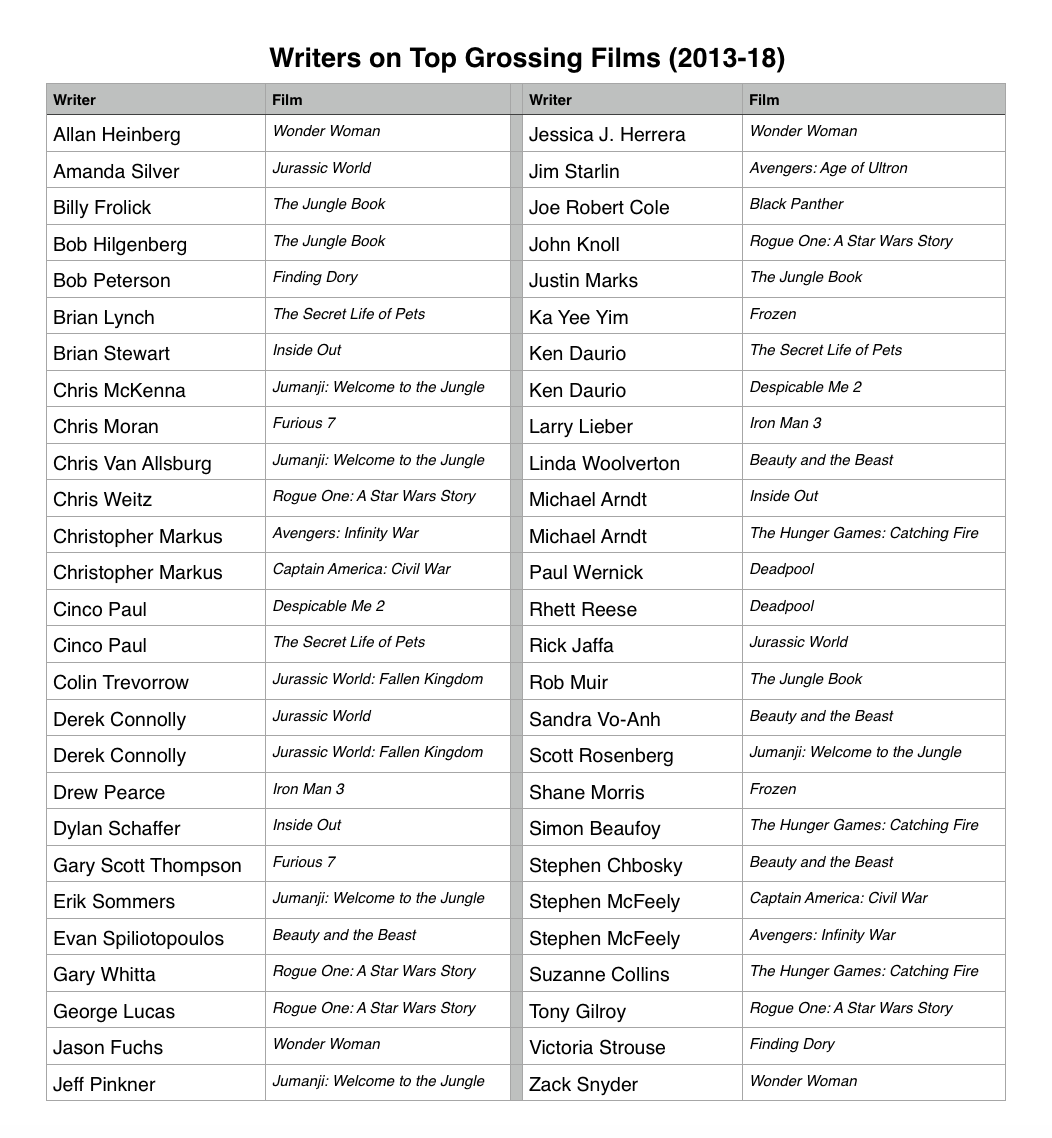

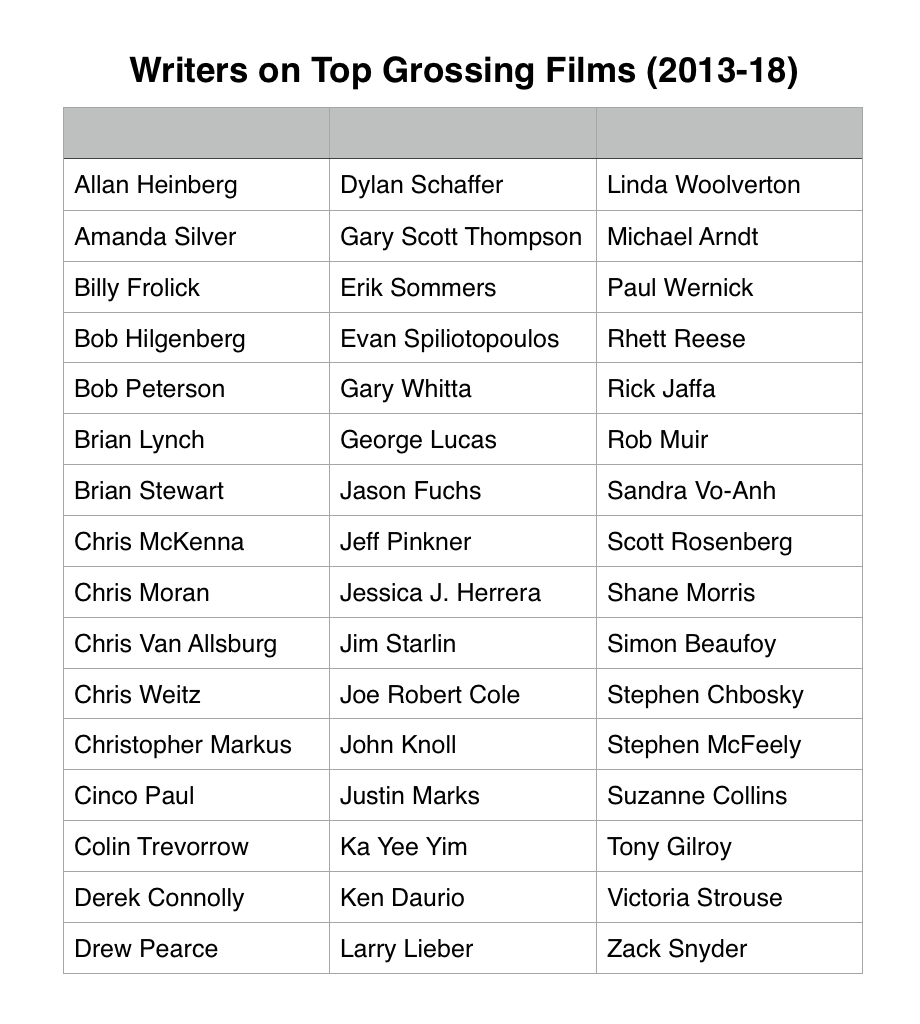

# APPENDIX

### Data Exploration: looking at the descriptive stats for domesitc gross

In [31]:
Writerse.domestic_gross.describe().astype(int)

count         4257
mean      79367252
std      106107469
min            388
25%        8224288
50%       41411015
75%      104897530
max      700059566
Name: domestic_gross, dtype: int64

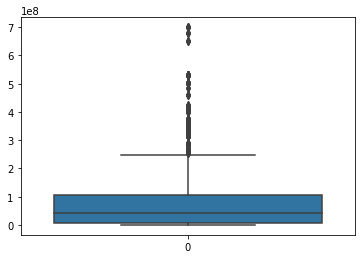

In [32]:
# Pretty clear that there are a lot of outliers far to the right of the distribution.
boxplot = sns.boxplot(data=Writerse['domestic_gross'])
boxplot

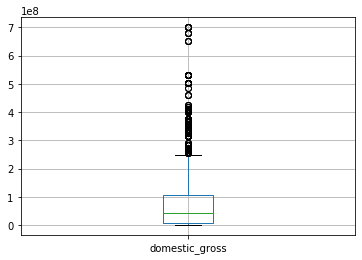

In [33]:
# Just trying to see if one of the visualization libraries was clearer than another. 
boxplot = Writerse.boxplot(column=['domestic_gross'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a20746940>]],
      dtype=object)

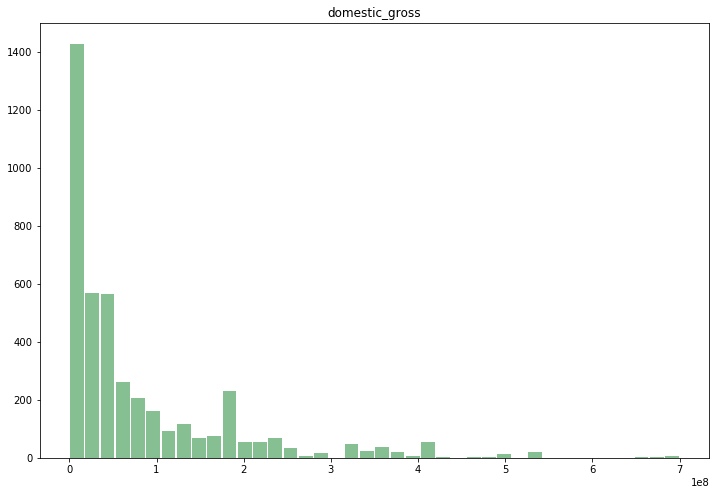

In [34]:
# This histogram really drives home that long tail. Given more time it would be interesting to look more at the median to 75% percentile.
Writerse.hist(column='domestic_gross', bins=40, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)